In [9]:
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd

In [6]:
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

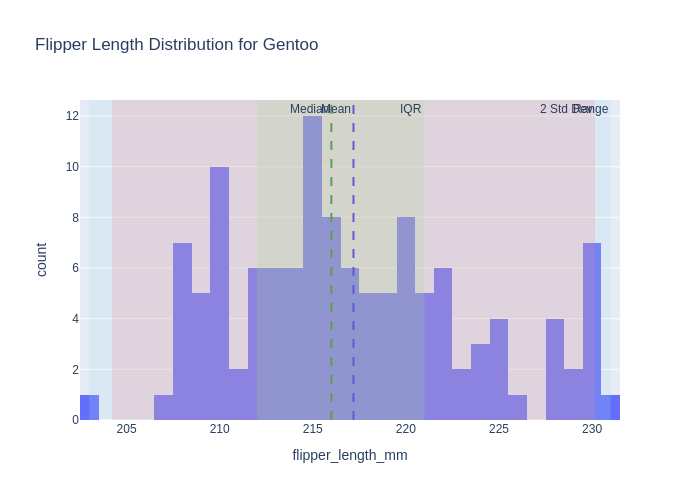

In [12]:
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Define a function to add lines and rectangles to a plotly figure
def add_lines_and_rectangles(fig, species_data):
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    std_dev = species_data['flipper_length_mm'].std()
    min_value = species_data['flipper_length_mm'].min()
    max_value = species_data['flipper_length_mm'].max()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    
    # Add vertical lines for the mean and median
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text='Mean', annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='green', dash='dash'), annotation_text='Median', annotation_position="top left")

    # Add rectangles for range and IQR
    fig.add_vrect(x0=min_value, x1=max_value, fillcolor="lightblue", opacity=0.2, annotation_text="Range", line_width=0)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="lightgreen", opacity=0.2, annotation_text="IQR", line_width=0)

    # Add rectangles for 2 standard deviations from the mean
    fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, fillcolor="lightcoral", opacity=0.2, annotation_text="2 Std Dev", line_width=0)

# Create histograms for each species
for species in penguins['species'].unique():
    species_data = penguins[penguins['species'] == species]
    fig = px.histogram(species_data, x='flipper_length_mm', nbins=30, title=f'Flipper Length Distribution for {species}')
    
    # Add lines and rectangles
    add_lines_and_rectangles(fig, species_data)
    
    # Show the figure
fig.show(renderer="png")

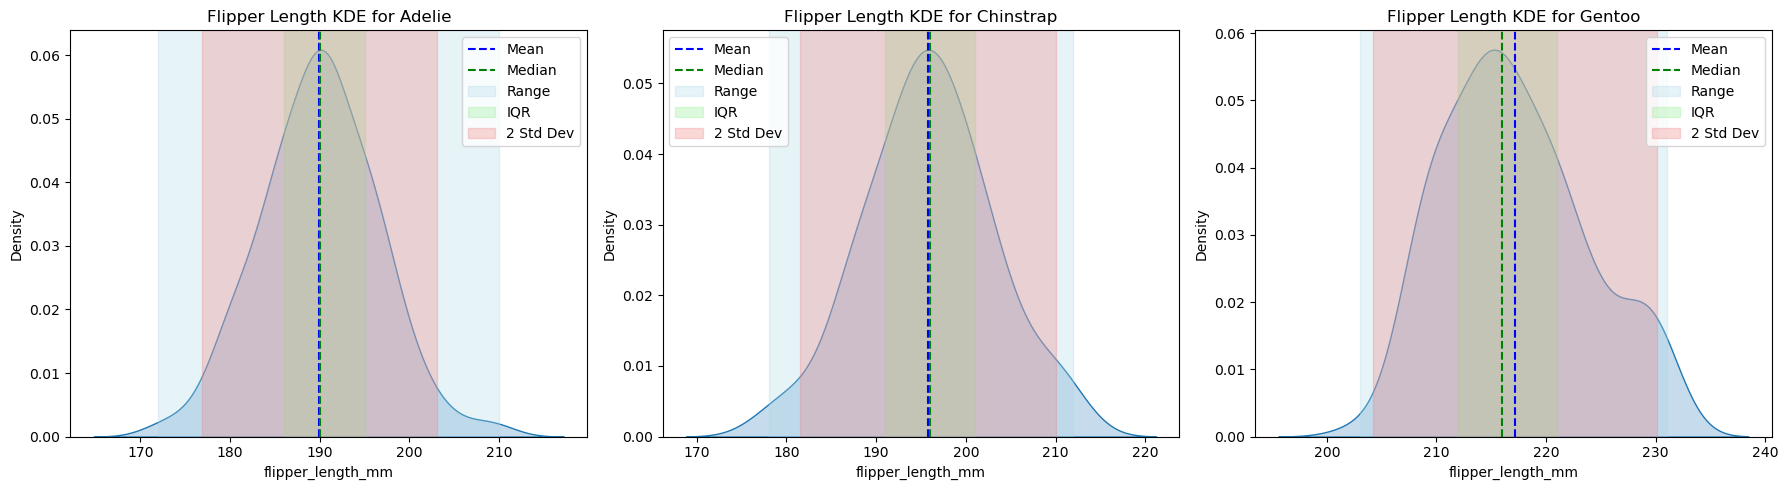

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out rows with missing flipper length values
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Define a function to plot KDE with lines and shaded areas
def plot_kde_with_statistics(ax, species_data, species_name):
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    std_dev = species_data['flipper_length_mm'].std()
    min_value = species_data['flipper_length_mm'].min()
    max_value = species_data['flipper_length_mm'].max()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)

    # Plot KDE for flipper_length_mm
    sns.kdeplot(species_data['flipper_length_mm'], ax=ax, fill=True)
    ax.set_title(f'Flipper Length KDE for {species_name}')

    # Add vertical lines for the mean and median
    ax.axvline(mean, color='blue', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle='--', label='Median')

    # Shade areas for the range, IQR, and 2 standard deviations
    ax.axvspan(min_value, max_value, color='lightblue', alpha=0.3, label='Range')
    ax.axvspan(q1, q3, color='lightgreen', alpha=0.3, label='IQR')
    ax.axvspan(mean - 2 * std_dev, mean + 2 * std_dev, color='lightcoral', alpha=0.3, label='2 Std Dev')

    ax.legend()

# Create subplots organized in a row (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot KDE for each species
for ax, species in zip(axes, penguins['species'].unique()):
    species_data = penguins[penguins['species'] == species]
    plot_kde_with_statistics(ax, species_data, species)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## 2.
I got confused on the difference between PLT and FIG, turns out they were jsut two different libraries, I asked chatgpt to generate the code above
## 3.
I prefer histograms, since they are pretty to read and can show shape. You can also change the representations by changing bin width. chatgpt gave the pros and cons, I also asked for ideal situations for each plot.

https://chatgpt.com/share/66f6268c-b4bc-8006-ac0f-cd004956ac2e

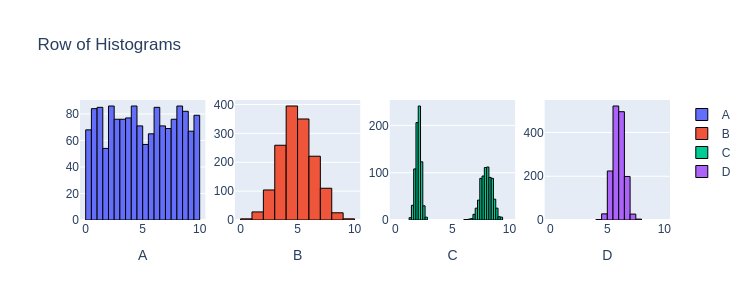

In [20]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

## 4.
    Which datasets have similar means and similar variances?
    Which datasets have similar means but quite different variances?
    Which datasets have similar variances but quite different means?
    Which datasets have quite different means and quite different variances?

1. It seems at first glance maybe B and C have similar means, and D looks like it as a different mean. Though when chatgpt looked at the data it said that A,B and C all have a similar mean.
2. A B and C have similar means and very different variances

3. None have similar variances

4. C and D have both different vairances and means.

https://chatgpt.com/share/66f628e0-abe8-8006-a9b5-45bcd385b1bc


In [21]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

## 5.

Chatgpts responses to the code and prompt:
Right-Skewed Data (sample1):

In sample1, due to the nature of the gamma distribution:
Mean: The mean is pulled to the right by the larger values, resulting in a mean greater than the median.
Median: The median, being the midpoint, remains lower because it is not affected by the extreme values as much.
Left-Skewed Data (sample2):

In sample2, the negative values cause:
Mean: The mean is now pulled to the left by the lower values, resulting in a mean less than the median.
Median: The median remains higher because it is the point where half the values fall below it, and it is less influenced by the extreme lower values.

For right skew the mean is bigger than the median for left skew the median is bigger than the mean.
https://chatgpt.com/share/66f62a53-4bec-8006-afe4-b3a1ae1b5bc6

## 6.  

https://github.com/rfordatascience/tidytuesday/tree/master/data/2023/2023-05-23

In [24]:
squirrelSet = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-05-23/squirrel_data.csv")

In [28]:
##squirrelSet.info()
squirrelSet.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [66]:
squirrelSet.columns.tolist()

['X',
 'Y',
 'Unique Squirrel ID',
 'Hectare',
 'Shift',
 'Date',
 'Hectare Squirrel Number',
 'Age',
 'Primary Fur Color',
 'Highlight Fur Color',
 'Combination of Primary and Highlight Color',
 'Color notes',
 'Location',
 'Above Ground Sighter Measurement',
 'Specific Location',
 'Running',
 'Chasing',
 'Climbing',
 'Eating',
 'Foraging',
 'Other Activities',
 'Kuks',
 'Quaas',
 'Moans',
 'Tail flags',
 'Tail twitches',
 'Approaches',
 'Indifferent',
 'Runs from',
 'Other Interactions',
 'Lat/Long']

In [40]:
squirrelSet.describe()

,X,Y,Date,Hectare Squirrel Number
count,3023.000000,3023.000000,3.023000e+03,3023.000000
mean,-73.967184,40.780853,1.011949e+07,4.123718
std,0.007726,0.010285,4.246671e+04,3.096492
min,-73.981159,40.764911,1.006202e+07,1.000000
25%,-73.973102,40.771676,1.008202e+07,2.000000
50%,-73.968594,40.778166,1.012202e+07,3.000000
75%,-73.960189,40.791219,1.014202e+07,6.000000
max,-73.949722,40.800119,1.020202e+07,23.000000


In [41]:
squirrelSet.shape

(3023, 31)

In [43]:
squirrelSet.isna().sum()

X                                                0
Y                                                0
Unique Squirrel ID                               0
Hectare                                          0
Shift                                            0
Date                                             0
Hectare Squirrel Number                          0
Age                                            121
Primary Fur Color                               55
Highlight Fur Color                           1086
Combination of Primary and Highlight Color       0
Color notes                                   2841
Location                                        64
Above Ground Sighter Measurement               114
Specific Location                             2547
Running                                          0
Chasing                                          0
Climbing                                         0
Eating                                           0
Foraging                       

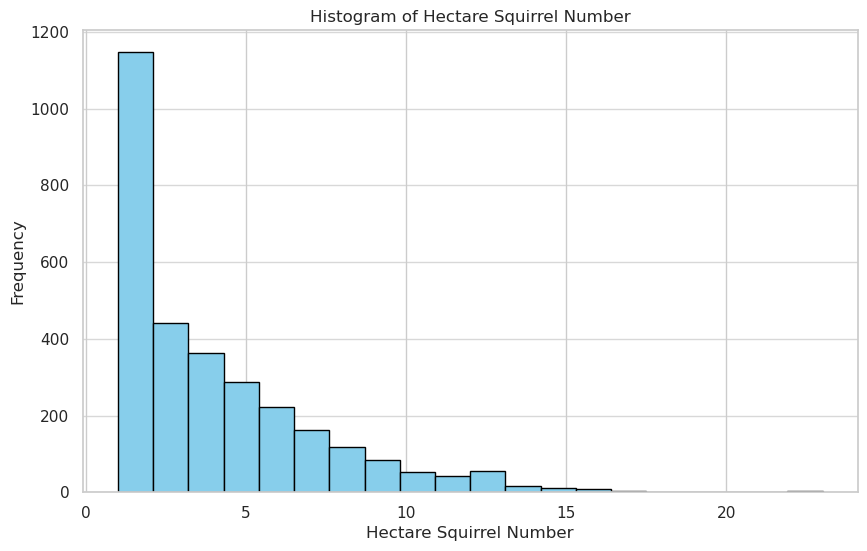

In [54]:
# Create a histogram for the 'Hectare Squirrel Number' column
plt.figure(figsize=(10, 6))
plt.hist(squirrelSet['Hectare Squirrel Number'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Hectare Squirrel Number')
plt.xlabel('Hectare Squirrel Number')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
# this visualization was created with chatGPT : https://chatgpt.com/share/66f6307c-e788-8006-a5db-11771c7e522d

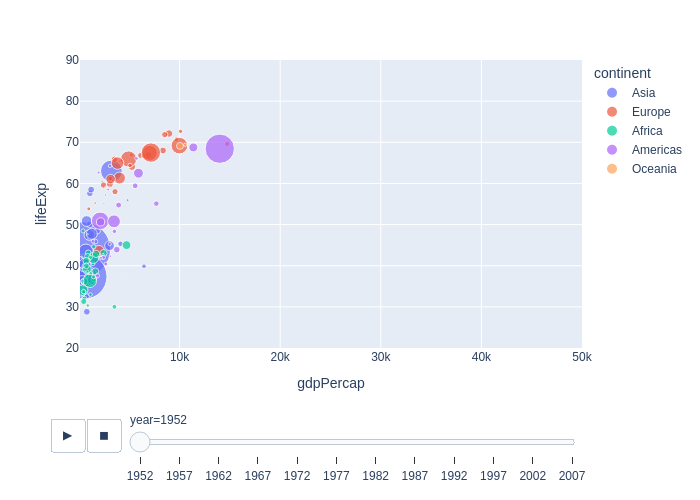

In [84]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show(renderer="png")

In [94]:
# import plotly.express as px
# df = px.data.gapminder()
# px.scatter(df, x="percent change", y="rank", animation_frame="year", animation_group="name",
#            size="percent", color="sex", hover_name="name", size_max=50, range_x=[-0.005,0.005])

# fig.show(renderer="png")


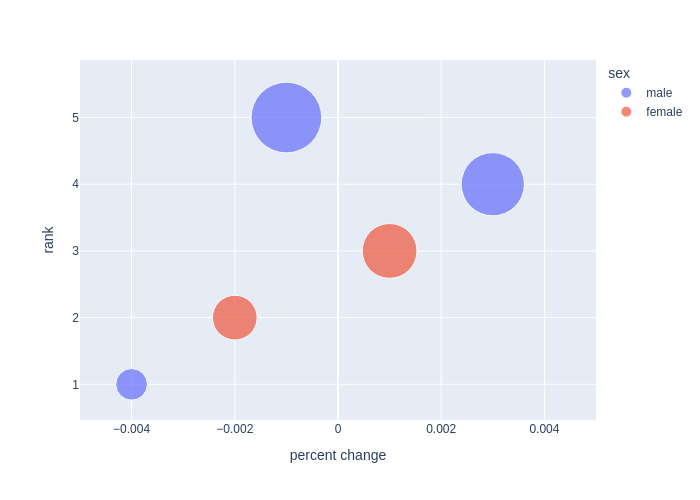

In [92]:
import plotly.express as px
import pandas as pd  # Import pandas

# Sample data similar to Gapminder for demonstration purposes
data = {
    "percent change": [-0.004, -0.002, 0.001, 0.003, -0.001],
    "rank": [1, 2, 3, 4, 5],
    "percent": [10, 20, 30, 40, 50],
    "sex": ["male", "female", "female", "male", "male"],
    "year": [2000, 2000, 2000, 2000, 2000],
    "name": ["Country A", "Country B", "Country C", "Country D", "Country E"]
}

# Create a DataFrame using pandas
df = pd.DataFrame(data)

# Create the scatter plot
fig = px.scatter(df, 
                 x="percent change", 
                 y="rank", 
                 size="percent", 
                 color="sex", 
                 animation_frame="year", 
                 animation_group="name", 
                 hover_name="name", 
                 size_max=50, 
                 range_x=[-0.005, 0.005])

# Show the figure
fig.show(renderer="png")


https://chatgpt.com/share/66f639a4-95cc-8006-b8bf-698803a19797

In this conversation, you attempted to create an animated scatter plot using Plotly Express with the Gapminder dataset, referencing non-existent columns like "percent change", "rank", and "percent". This resulted in a ValueError. I explained the issues with the column names and provided a corrected code example using valid columns ("gdpPercap", "lifeExp", and "country"). We discussed the importance of using the correct dataset column names when working with data visualization libraries. If you need more assistance, feel free to ask!


9. somewhat. 